In [1]:
# Data Analysis
import pandas as pd  #Pandas Dataframe/Series
import numpy as np  #Linear algebra

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from pylab import rcParams

from collections import Counter

In [2]:
# Show First 5 records
data = pd.read_csv('Employee_Attrition.csv')
data.head(3)

,index,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex,Total_Experience,Left_Company,source
0,0,emp-1,3424.0,2462.0,408.0,2462.0,42,2849,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,3,0.0,train
1,1,emp-10,2006.0,1274.0,328.0,691.0,13,616,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,4,1.0,train
2,2,emp-100,3607.0,3275.0,224.0,3235.0,23,3388,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,2,0.0,train


### Creating a new column as 'Gender' for distribution of Categorical data

In [40]:
data['Gender'] = np.where((data['Sex']==0),'Male','Female')

### Renaming the entries as 'Yes' or 'No' in the column  'Left_Company'

In [80]:
data['Left_Company'] = np.where((data['Left_Company']==0.0),'No','Yes')

## 1. Distribution of dataset: The first step is to check the distribution of each Categorical and Numerical feature variables, so that we can get insights of the employee details.

In [82]:
# Description of Numerical data
data.describe()

,index,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Sex,Total_Experience
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,105.287162,3086.671959,2138.057770,268.919595,1068.882432,21.006757,1560.858108,0.875000,2.793919
std,74.417981,1395.801239,1165.789357,152.697278,1076.220867,13.011076,1084.174787,0.331279,1.461864
min,0.000000,90.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,36.750000,1822.000000,1101.250000,145.125000,80.375000,11.000000,695.750000,1.000000,2.000000
50%,96.500000,3299.500000,2168.850000,272.000000,728.500000,20.000000,1477.000000,1.000000,3.000000
75%,170.250000,4250.250000,3246.000000,392.000000,1752.475000,28.000000,2406.500000,1.000000,4.000000
max,244.000000,5406.900000,4285.500000,859.000000,3857.000000,83.000000,4113.000000,1.000000,7.000000


In [83]:
# Description of Categorical data
data.describe(include='O')

,EmployeeID,Job_History,Joining_Date,Designation,Left_Company,source,Gender
count,296,296,296,296,296,296,296
unique,296,295,61,5,2,2,2
top,emp-84,Worked at Company - 616,2012_05,Junior,No,train,Female
freq,1,2,19,89,218,245,259


#### Distribution of Employee Number of projects:

Text(0, 0.5, 'Distribution')

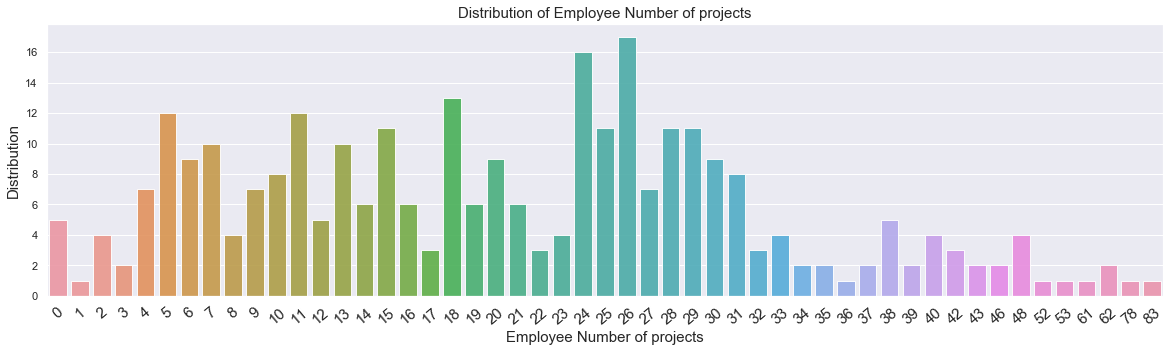

In [84]:
rcParams['figure.figsize'] = 20, 5
NoOfProject_count = data.NoOfProjects.value_counts()

sb.set(style="darkgrid")
sb.barplot(NoOfProject_count.index, NoOfProject_count.values, alpha=0.9)
plt.xticks(rotation=40, fontsize=15)
plt.title('Distribution of Employee Number of projects',fontsize=15)
plt.xlabel('Employee Number of projects', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

#### Distribution of Employee Total Expereince:

Text(0, 0.5, 'Distribution')

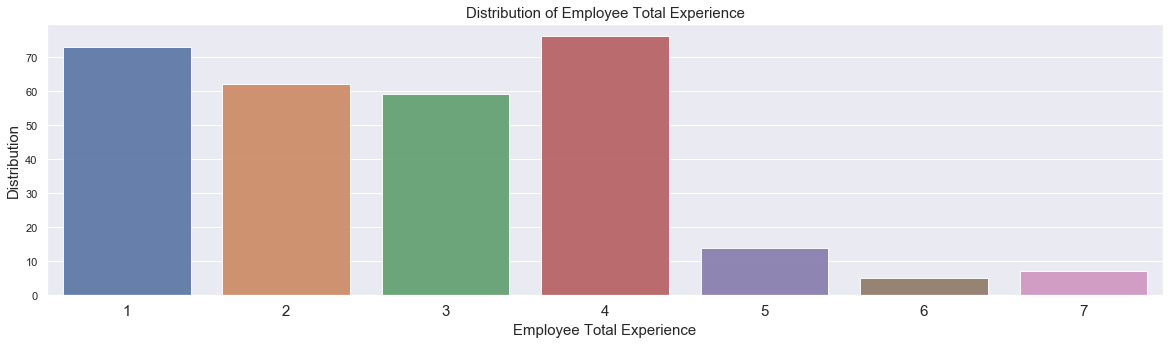

In [85]:
rcParams['figure.figsize'] = 20, 5
Total_Experience_count = data.Total_Experience.value_counts()

sb.set(style="darkgrid")
sb.barplot(Total_Experience_count.index, Total_Experience_count.values, alpha=0.9)
plt.xticks(fontsize=15)
plt.title('Distribution of Employee Total Experience',fontsize=15)
plt.xlabel('Employee Total Experience', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

#### Box plot for TotalWorkingHours, Billable_Hours, Hours_off_Duty, Touring_Hours, ActualTimeSpent

Text(0, 0.5, 'Distribution')

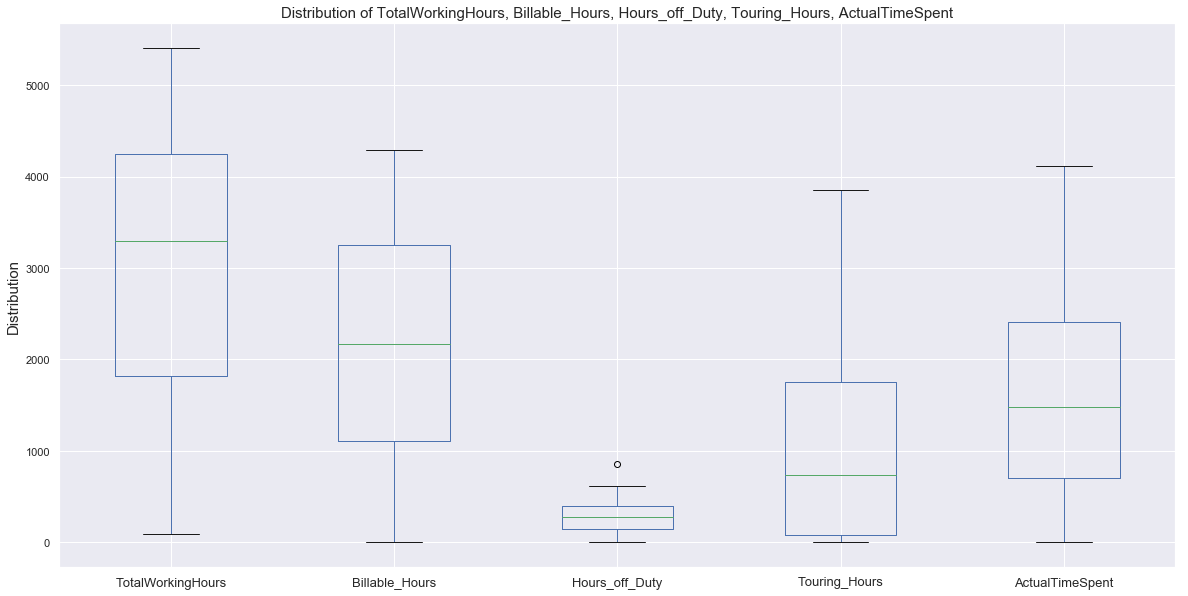

In [86]:
rcParams['figure.figsize'] = 20, 10

columns = ['TotalWorkingHours','Billable_Hours','Hours_off_Duty','Touring_Hours','ActualTimeSpent']
data[columns].plot.box()
plt.xticks(fontsize=13)

plt.title('Distribution of TotalWorkingHours, Billable_Hours, Hours_off_Duty, Touring_Hours, ActualTimeSpent',fontsize=15)
plt.ylabel('Distribution', fontsize=15)

#### Distribution of Employee Gender

Text(0, 0.5, 'Distribution')

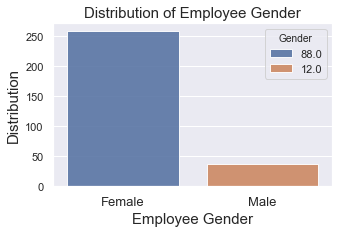

In [87]:
rcParams['figure.figsize'] = 5, 3
EmpGender_count = data.Gender.value_counts()
EmpGender_Percentage = round(EmpGender_count / data.Gender.count() * 100)
EmpGender_Percentage1 = EmpGender_Percentage.sort_values(ascending=False)

sb.set(style="darkgrid")
sb.barplot(EmpGender_count.index, EmpGender_count.values, dodge=False ,alpha=0.9,hue=EmpGender_Percentage,hue_order=EmpGender_Percentage1)
plt.xticks(fontsize=13)
plt.title('Distribution of Employee Gender',fontsize=15)
plt.xlabel('Employee Gender', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

#### Distribution of Employee Designation

Text(0, 0.5, 'Distribution')

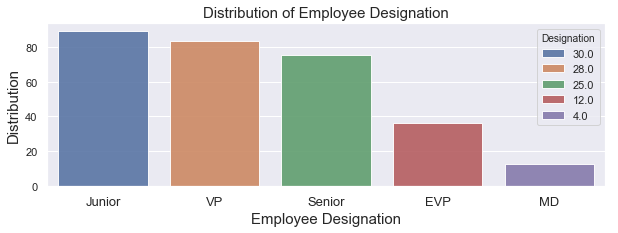

In [88]:
rcParams['figure.figsize'] = 10, 3
EmpDesignation_count = data.Designation.value_counts()
EmpDesignation_Percentage = round(EmpDesignation_count / data.Designation.count() * 100)
EmpDesignation_Percentage1 = EmpDesignation_Percentage.sort_values(ascending=False)

sb.set(style="darkgrid")
sb.barplot(EmpDesignation_count.index, EmpDesignation_count.values, dodge=False ,alpha=0.9,hue=EmpDesignation_Percentage,hue_order=EmpDesignation_Percentage1)
plt.xticks(fontsize=13)
plt.title('Distribution of Employee Designation',fontsize=15)
plt.xlabel('Employee Designation', fontsize=15)
plt.ylabel('Distribution', fontsize=15)


### Designation wise Employee attrition:

In [94]:
Data_Junior = data[data['Designation'] == 'Junior']
Data_VP = data[data['Designation'] == 'VP']
Data_Senior = data[data['Designation'] == 'Senior']
Data_EVP = data[data['Designation'] == 'EVP']
Data_MD = data[data['Designation'] == 'MD']

In [104]:
data_desg = data.groupby(['Designation', 'Gender','Left_Company'])['Designation'].count().unstack('Left_Company').fillna(0)
data_desg

Left_Company        No  Yes
Designation Gender         
EVP         Female  26    8
            Male     1    1
Junior      Female  58   15
            Male    11    5
MD          Female  10    3
Senior      Female  53   14
            Male     5    3
VP          Female  47   25
            Male     7    4

Text(0, 0.5, 'Distribution')

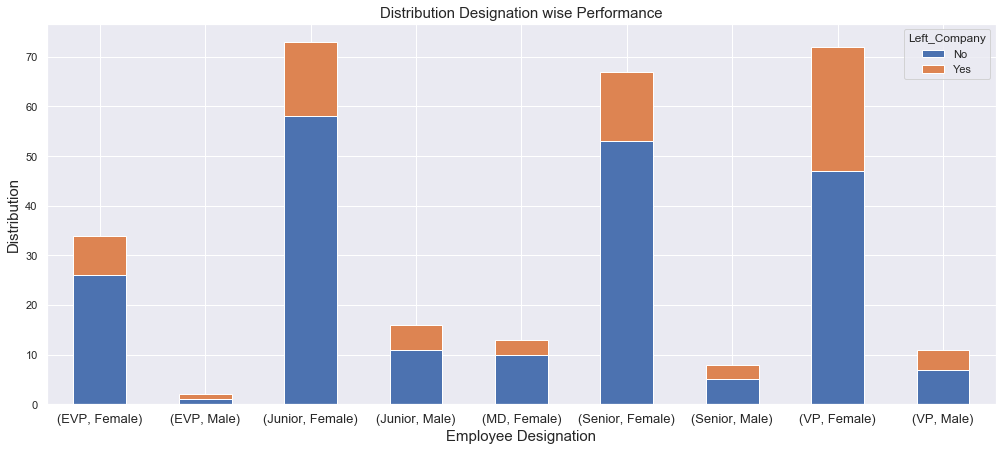

In [105]:
data_desg[['No','Yes']].plot(kind='bar', stacked=True, figsize =(17,7))
plt.xticks(rotation = 0,fontsize=13)
plt.title('Distribution Designation wise Performance',fontsize=15)
plt.xlabel('Employee Designation', fontsize=15)
plt.ylabel('Distribution', fontsize=15)

#### In above plot, among all the designations, majority of female candidates are leaving the company

### Designation 'Junior'

#### Attrition based on Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours, NoOfProjects, ActualTimeSpent, Total_Experience

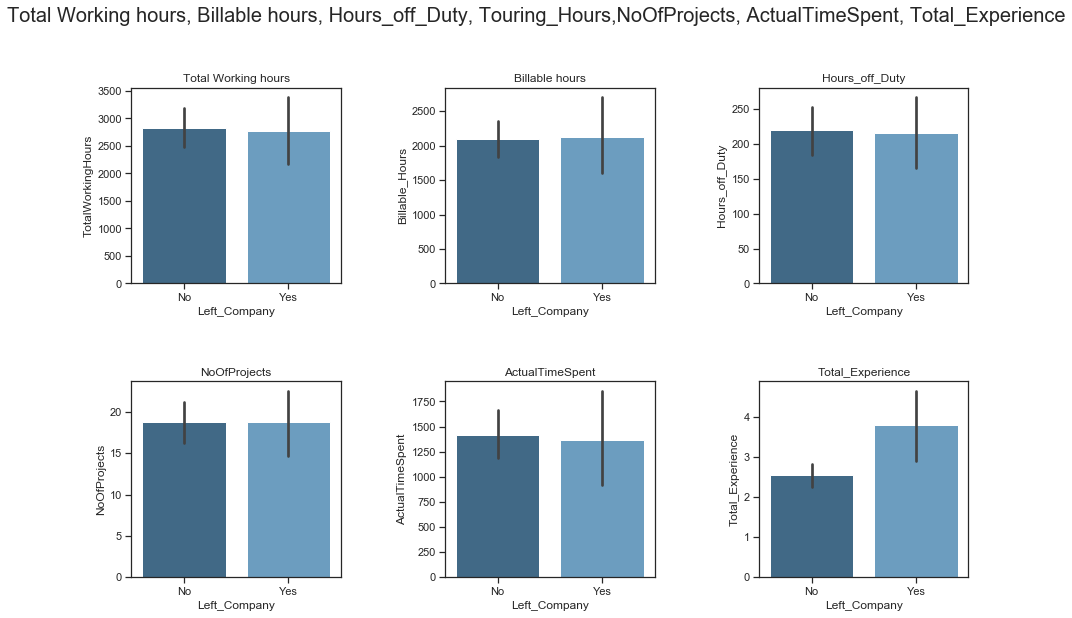

In [196]:
fig, ax = plt.subplots(figsize=(15,8), ncols=3, nrows=2)
plt.suptitle("Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours,NoOfProjects, ActualTimeSpent, Total_Experience", y = 1.09, fontsize=20)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.95   # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left,  
    right   =  right, 
    top     =  top, 
    bottom  =  bottom,
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Total Working hours")
ax[0][1].set_title("Billable hours")
ax[0][2].set_title("Hours_off_Duty")
ax[1][0].set_title("NoOfProjects")
ax[1][1].set_title("ActualTimeSpent")
ax[1][2].set_title("Total_Experience")

sb.barplot(Data_Junior.Left_Company, Data_Junior.TotalWorkingHours, palette="Blues_d", ax=ax[0][0]);
sb.barplot(Data_Junior.Left_Company, Data_Junior.Billable_Hours, palette="Blues_d", ax=ax[0][1]);
sb.barplot(Data_Junior.Left_Company, Data_Junior.Hours_off_Duty, palette="Blues_d", ax=ax[0][2]);
sb.barplot(Data_Junior.Left_Company, Data_Junior.NoOfProjects, palette="Blues_d", ax=ax[1][0]);
sb.barplot(Data_Junior.Left_Company, Data_Junior.ActualTimeSpent, palette="Blues_d", ax=ax[1][1]);
sb.barplot(Data_Junior.Left_Company, Data_Junior.Total_Experience, palette="Blues_d", ax=ax[1][2]);


#### By plotting the graph above, we get some insights about Junior designation:
- The employee who have less working hours have left the company.
- The employee who have more billable hours have left the company.
- The employee who are having less hours off duty have left the company.
- The employee who have spent less time working have left the company.
- The employee who are having more number of previous experience have left the company.

### Designation 'Senior'

#### Attrition based on Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours, NoOfProjects, ActualTimeSpent, Total_Experience

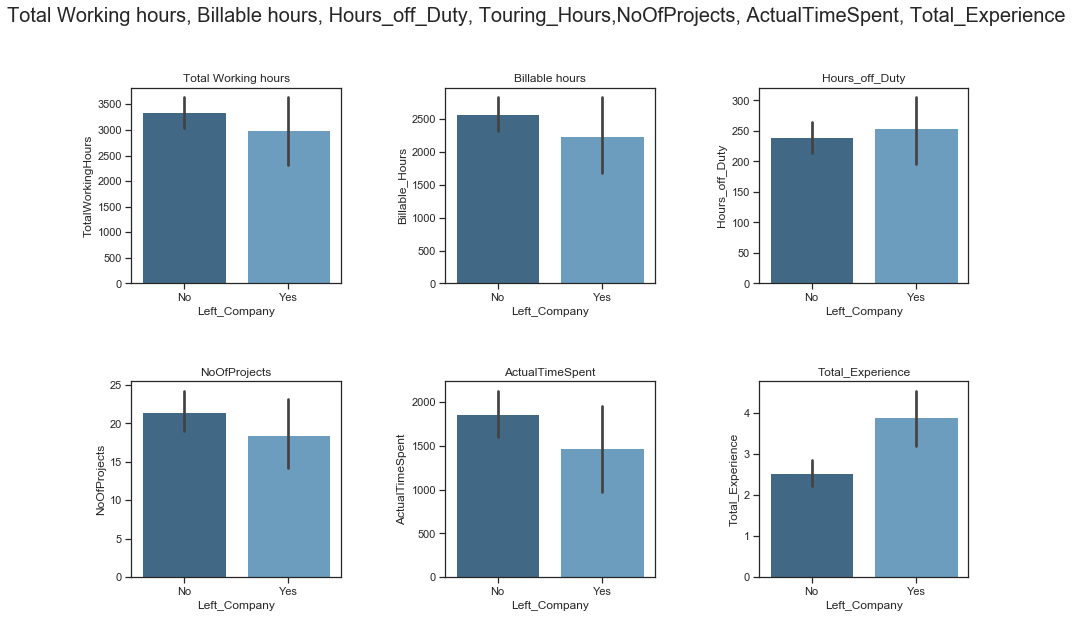

In [197]:
fig, ax = plt.subplots(figsize=(15,8), ncols=3, nrows=2)
plt.suptitle("Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours,NoOfProjects, ActualTimeSpent, Total_Experience", y = 1.09, fontsize=20)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.95   # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left,  
    right   =  right, 
    top     =  top, 
    bottom  =  bottom,
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Total Working hours")
ax[0][1].set_title("Billable hours")
ax[0][2].set_title("Hours_off_Duty")
ax[1][0].set_title("NoOfProjects")
ax[1][1].set_title("ActualTimeSpent")
ax[1][2].set_title("Total_Experience")

sb.barplot(Data_Senior.Left_Company, Data_Senior.TotalWorkingHours, palette="Blues_d", ax=ax[0][0]);
sb.barplot(Data_Senior.Left_Company, Data_Senior.Billable_Hours, palette="Blues_d", ax=ax[0][1]);
sb.barplot(Data_Senior.Left_Company, Data_Senior.Hours_off_Duty, palette="Blues_d", ax=ax[0][2]);
sb.barplot(Data_Senior.Left_Company, Data_Senior.NoOfProjects, palette="Blues_d", ax=ax[1][0]);
sb.barplot(Data_Senior.Left_Company, Data_Senior.ActualTimeSpent, palette="Blues_d", ax=ax[1][1]);
sb.barplot(Data_Senior.Left_Company, Data_Senior.Total_Experience, palette="Blues_d", ax=ax[1][2]);


#### By plotting the graph above, we get some insights about Junior designation:
- The employee who have less working hours have left the company.
- The employee who have more billable hours have left the company.
- The employee who are having more hours off duty have left the company.
- The employee who are having less number of projects have left the company.
- The employee who have spent less time working have left the company.
- The employee who are having more number of previous experience have left the company.

### Designation 'MD'

#### Attrition based on Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours, NoOfProjects, ActualTimeSpent, Total_Experience

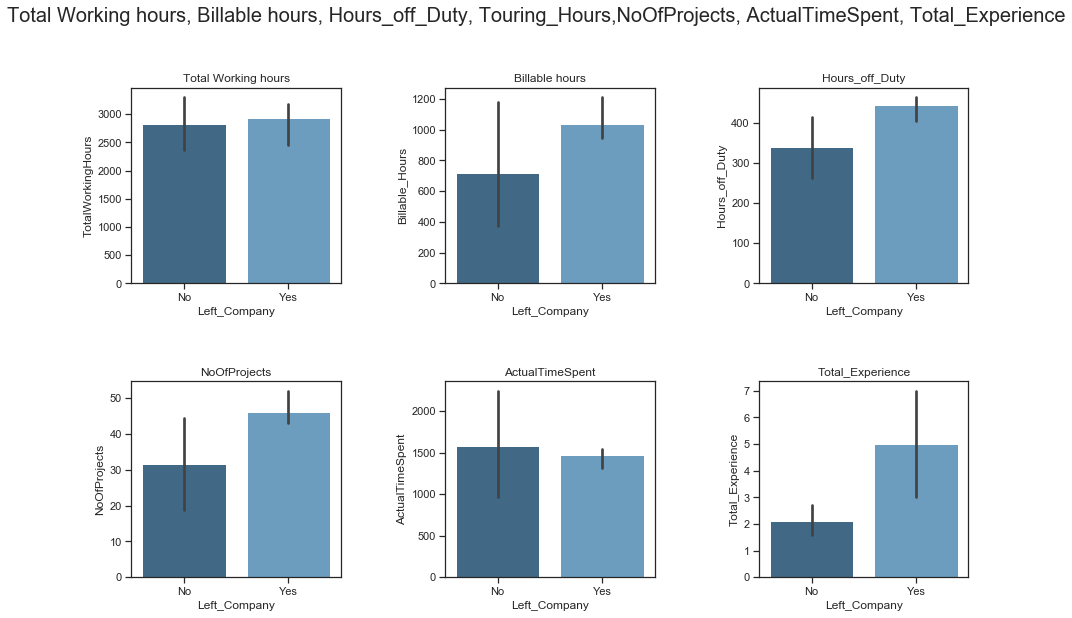

In [198]:
fig, ax = plt.subplots(figsize=(15,8), ncols=3, nrows=2)
plt.suptitle("Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours,NoOfProjects, ActualTimeSpent, Total_Experience", y = 1.09, fontsize=20)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.95   # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left,  
    right   =  right, 
    top     =  top, 
    bottom  =  bottom,
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Total Working hours")
ax[0][1].set_title("Billable hours")
ax[0][2].set_title("Hours_off_Duty")
ax[1][0].set_title("NoOfProjects")
ax[1][1].set_title("ActualTimeSpent")
ax[1][2].set_title("Total_Experience")

sb.barplot(Data_MD.Left_Company, Data_MD.TotalWorkingHours, palette="Blues_d", ax=ax[0][0]);
sb.barplot(Data_MD.Left_Company, Data_MD.Billable_Hours, palette="Blues_d", ax=ax[0][1]);
sb.barplot(Data_MD.Left_Company, Data_MD.Hours_off_Duty, palette="Blues_d", ax=ax[0][2]);
sb.barplot(Data_MD.Left_Company, Data_MD.NoOfProjects, palette="Blues_d", ax=ax[1][0]);
sb.barplot(Data_MD.Left_Company, Data_MD.ActualTimeSpent, palette="Blues_d", ax=ax[1][1]);
sb.barplot(Data_MD.Left_Company, Data_MD.Total_Experience, palette="Blues_d", ax=ax[1][2]);


#### By plotting the graph above, we get some insights about Junior designation:
- The employee who have more working hours have left the company.
- The employee who have more billable hours have left the company.
- The employee who are having more hours off duty have left the company.
- The employee who are having more number of projects have left the company.
- The employee who have spent less time working have left the company.
- The employee who are having more number of previous exp have left the company.

### Designation 'VP'

#### Attrition based on Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours, NoOfProjects, ActualTimeSpent, Total_Experience

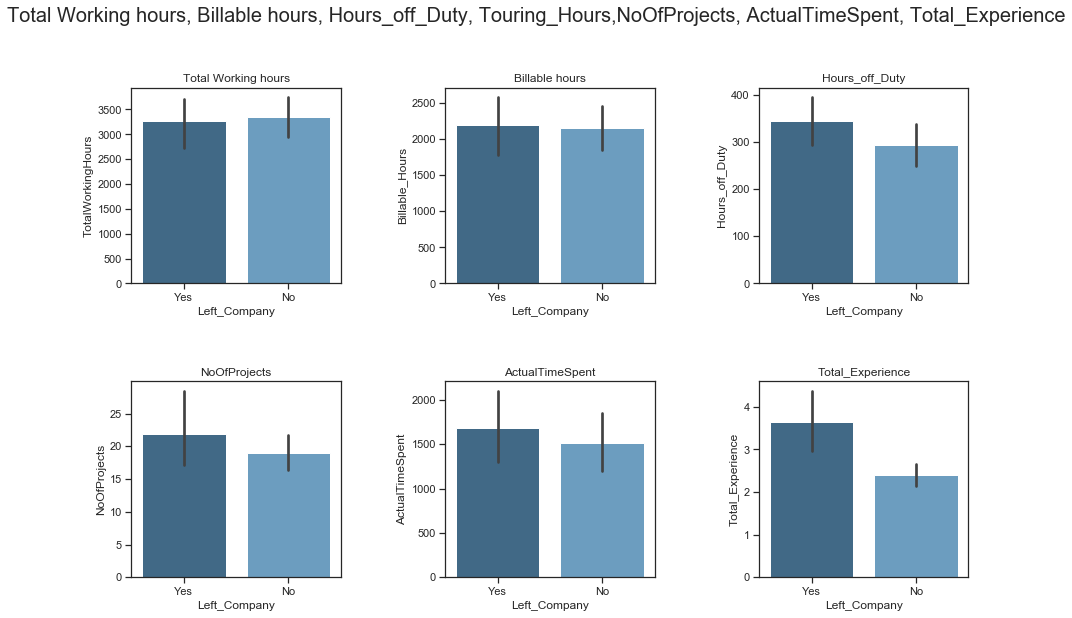

In [199]:
fig, ax = plt.subplots(figsize=(15,8), ncols=3, nrows=2)
plt.suptitle("Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours,NoOfProjects, ActualTimeSpent, Total_Experience", y = 1.09, fontsize=20)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.95   # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left,  
    right   =  right, 
    top     =  top, 
    bottom  =  bottom,
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Total Working hours")
ax[0][1].set_title("Billable hours")
ax[0][2].set_title("Hours_off_Duty")
ax[1][0].set_title("NoOfProjects")
ax[1][1].set_title("ActualTimeSpent")
ax[1][2].set_title("Total_Experience")

sb.barplot(Data_VP.Left_Company, Data_VP.TotalWorkingHours, palette="Blues_d", ax=ax[0][0]);
sb.barplot(Data_VP.Left_Company, Data_VP.Billable_Hours, palette="Blues_d", ax=ax[0][1]);
sb.barplot(Data_VP.Left_Company, Data_VP.Hours_off_Duty, palette="Blues_d", ax=ax[0][2]);
sb.barplot(Data_VP.Left_Company, Data_VP.NoOfProjects, palette="Blues_d", ax=ax[1][0]);
sb.barplot(Data_VP.Left_Company, Data_VP.ActualTimeSpent, palette="Blues_d", ax=ax[1][1]);
sb.barplot(Data_VP.Left_Company, Data_VP.Total_Experience, palette="Blues_d", ax=ax[1][2]);


#### By plotting the graph above, we get some insights about Junior designation:
- The employee who have less working hours have left the company.
- The employee who have more billable hours have left the company.
- The employee who are having more hours off duty have left the company.
- The employee who are having more number of projects have left the company.
- The employee who have spent more time working have left the company.
- The employee who are having more number of previous exp have left the company.

### Designation 'EVP'

#### Attrition based on Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours, NoOfProjects, ActualTimeSpent, Total_Experience

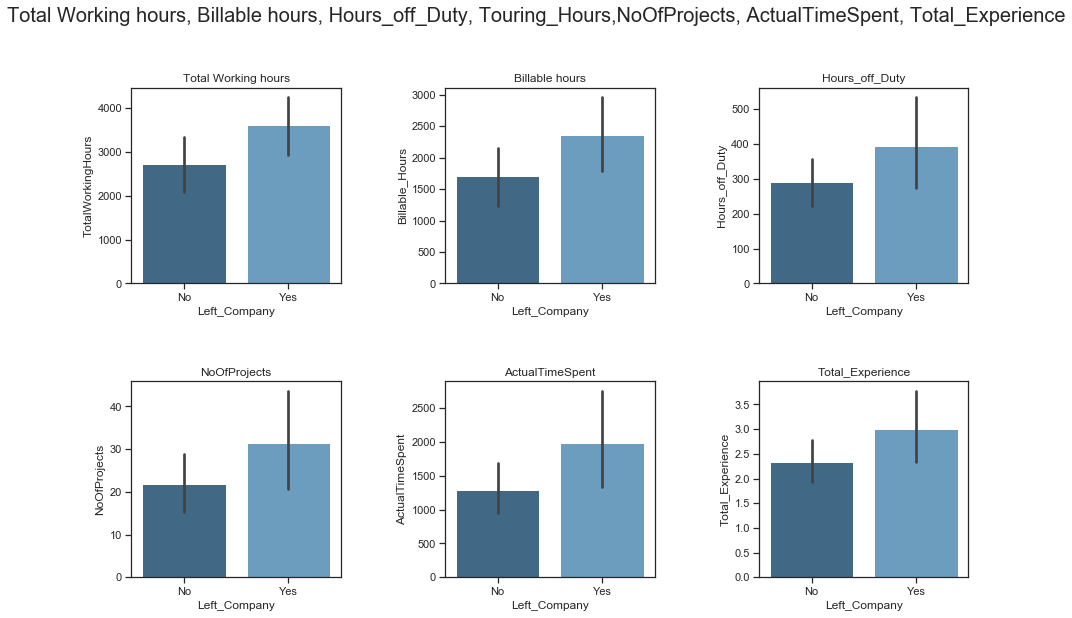

In [200]:
fig, ax = plt.subplots(figsize=(15,8), ncols=3, nrows=2)
plt.suptitle("Total Working hours, Billable hours, Hours_off_Duty, Touring_Hours,NoOfProjects, ActualTimeSpent, Total_Experience", y = 1.09, fontsize=20)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.95   # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left,  
    right   =  right, 
    top     =  top, 
    bottom  =  bottom,
    wspace  =  wspace, 
    hspace  =  hspace
)

ax[0][0].set_title("Total Working hours")
ax[0][1].set_title("Billable hours")
ax[0][2].set_title("Hours_off_Duty")
ax[1][0].set_title("NoOfProjects")
ax[1][1].set_title("ActualTimeSpent")
ax[1][2].set_title("Total_Experience")

sb.barplot(Data_EVP.Left_Company, Data_EVP.TotalWorkingHours, palette="Blues_d", ax=ax[0][0]);
sb.barplot(Data_EVP.Left_Company, Data_EVP.Billable_Hours, palette="Blues_d", ax=ax[0][1]);
sb.barplot(Data_EVP.Left_Company, Data_EVP.Hours_off_Duty, palette="Blues_d", ax=ax[0][2]);
sb.barplot(Data_EVP.Left_Company, Data_EVP.NoOfProjects, palette="Blues_d", ax=ax[1][0]);
sb.barplot(Data_EVP.Left_Company, Data_EVP.ActualTimeSpent, palette="Blues_d", ax=ax[1][1]);
sb.barplot(Data_EVP.Left_Company, Data_EVP.Total_Experience, palette="Blues_d", ax=ax[1][2]);


#### By plotting the graph above, we get some insights about EVP designation:
- The employee who have more working hours have left the company.
- The employee who have more billable hours have left the company.
- The employee who are having more hours off duty have left the company.
- The employee who are having more number of projects have left the company.
- The employee who have spent more time working have left the company.
- The employee who are having more number of previous exp have left the company.

### The resultant distribution of the above features and graphs gives some insights as follows:
- Majority of employee are female candidates.
- Number of projects varies from 0 to 83, where most of the employee's no of projects varies from 4 to 31.
- Majority of the employee total experience are less than 5.
- Distribution of employee designation shows Junior designation having 30%, VP 28%, Senior 25%, EVP 12% and MD 4%. 
- Among all the designations, majority of female candidates are leaving the company.
- The employees who are having more Billable hours and less working hours have left the company.
- The employees who took more hours off duty have left the company.
- The employees who are having more number of previous work experience have left the company.

<br>
    
### 2. Correlation of Features: After finding the distribution of the all feature variable with target variables, the second step we can analyze the employees attrition insights is by finding how each numerical variables are  correlated to one another. And also we can find the correlation between numerical variables with the Attrition (LeftCompany). 

### Renaming the entries back to  '1' or '0' in the column  'Left_Company'

In [186]:
data['Left_Company'] = np.where((data['Left_Company']=='No'),0,1)

In [190]:
# Getting only the Numerical data to check for Correlation
numerical_data = data.select_dtypes(include=np.number)
numerical_data.corr()

,index,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Sex,Total_Experience,Left_Company
index,1.000000,0.199538,0.152623,0.152682,0.113367,0.153070,0.143156,-0.058902,0.135530,-0.260889
TotalWorkingHours,0.199538,1.000000,0.916494,0.828684,0.517861,0.754305,0.808926,-0.095553,-0.035171,0.009599
Billable_Hours,0.152623,0.916494,1.000000,0.666517,0.568621,0.656099,0.840295,-0.112278,-0.065508,0.013803
Hours_off_Duty,0.152682,0.828684,0.666517,1.000000,0.316459,0.706065,0.654893,-0.078201,0.005933,0.127351
Touring_Hours,0.113367,0.517861,0.568621,0.316459,1.000000,0.361960,0.462703,-0.024771,0.044592,0.009658
NoOfProjects,0.153070,0.754305,0.656099,0.706065,0.361960,1.000000,0.723133,-0.034407,-0.087255,0.064042
ActualTimeSpent,0.143156,0.808926,0.840295,0.654893,0.462703,0.723133,1.000000,-0.037160,-0.049996,0.013023
Sex,-0.058902,-0.095553,-0.112278,-0.078201,-0.024771,-0.034407,-0.037160,1.000000,0.030624,-0.075361
Total_Experience,0.135530,-0.035171,-0.065508,0.005933,0.044592,-0.087255,-0.049996,0.030624,1.000000,0.378733
Left_Company,-0.260889,0.009599,0.013803,0.127351,0.009658,0.064042,0.013023,-0.075361,0.378733,1.000000


### Correlation between Numerical variables with LeftCompany

In [191]:
numerical_data.corr().Left_Company.sort_values(ascending=False)

Left_Company         1.000000
Total_Experience     0.378733
Hours_off_Duty       0.127351
NoOfProjects         0.064042
Billable_Hours       0.013803
ActualTimeSpent      0.013023
Touring_Hours        0.009658
TotalWorkingHours    0.009599
Sex                 -0.075361
index               -0.260889
Name: Left_Company, dtype: float64

### Plotting the Heatmap for all the Numerical variables

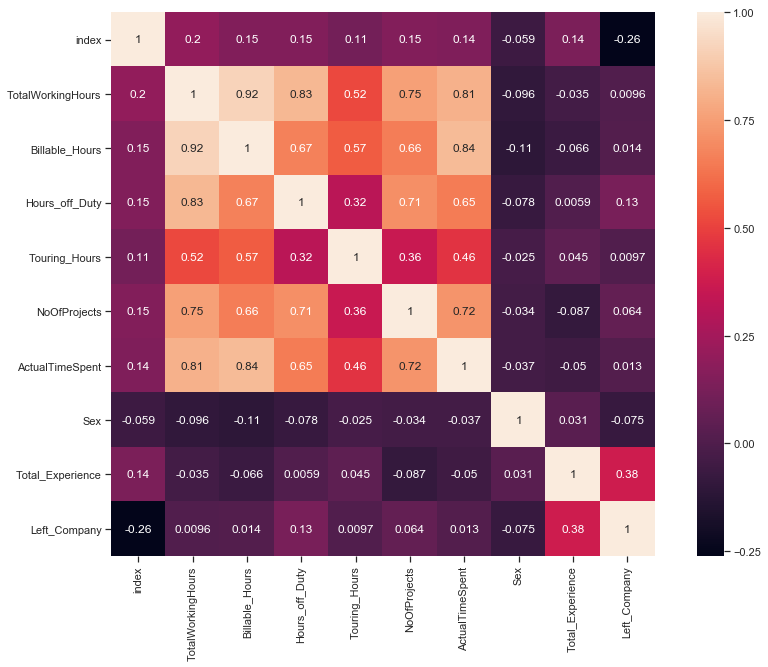

In [194]:
corr_data = numerical_data.corr()
f,ax = plt.subplots(figsize = (15,10))
sb.heatmap(corr_data,vmax=1,square=True,annot=True)

<br>
    
### The above Correlation **Heat Map** gives graphical representation (ranging from 0 to 1) of how each numerical variables are correlated between each other. By this mapping, we can derive some of the insights as below:

- The highest correlation we can find in the above Heat map is between Total Working Hours and Billable hours of the employee when compared to other feature variables. It represents as the empoloyees who are having more working hours gets to spend more billable hours.

- The second highest correlation we can find is between Total Working Hours, Billable hours and Actual Time spent by the employee. It represnts the employee who have spent less number of hours among these have left the company.

- There is a good correlation between Total Working Hours and Number of Projects. This represents as number of working hours increases, more number of projects done by the employee. 

- Total work Experience of an employee have a good correlation with the target variable 'LeftCompany'. As from the insight  we got from the distribution above, the employee who has more number of work experience have left the company.
